In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow

In [ ]:
import keras

Using TensorFlow backend.


In [86]:
from keras.datasets import mnist

In [87]:
mnist_path = 'mnist.pkl.gz'

In [88]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(mnist_path)

In [89]:
X_train.shape

(60000, 28, 28)

In [90]:
y_train.shape

(60000,)

In [91]:
X_test.shape

(10000, 28, 28)

In [92]:
y_test.shape

(10000,)

In [93]:
type(X_test)

numpy.ndarray

In [94]:
type(y_test)

numpy.ndarray

In [95]:
len(X_train)

60000

In [96]:
len(y_test)

10000

In [256]:
#X_train[0] # Checking the first digit

In [98]:
y_train # 0 to 9


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [99]:
y_train[:20] # The first10 digits

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [100]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [101]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

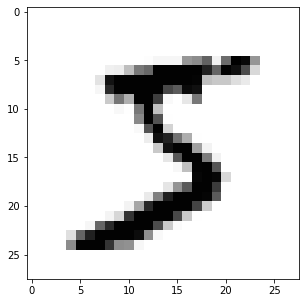

In [102]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
image=ax.imshow(X_train[0], cmap=plt.cm.Greys)
image.set_interpolation('nearest')
plt.show()

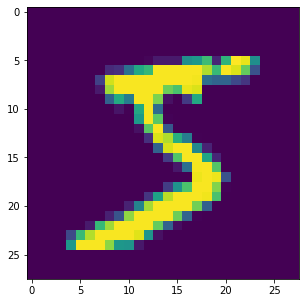

In [103]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
image=ax.imshow(X_train[0])
image.set_interpolation('nearest')
plt.show()

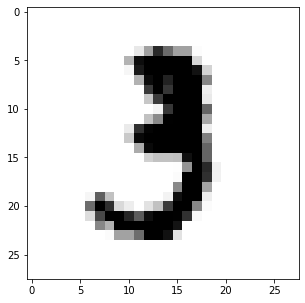

In [104]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
image=ax.imshow(X_train[10], cmap=plt.cm.Greys)
image.set_interpolation('nearest')
plt.show()

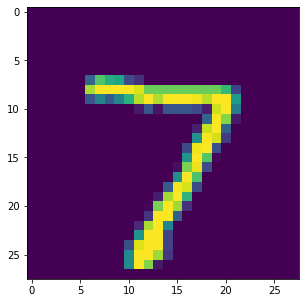

In [105]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
image=ax.imshow(X_test[0])
image.set_interpolation('nearest')
plt.show()

# Multilayer perceptron 

In [175]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [176]:
mnist_path = 'mnist.pkl.gz'

In [177]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(mnist_path)

In [178]:
X_train.shape

(60000, 28, 28)

In [255]:
X_test.shape

(10000, 784)

In [180]:
X_train = X_train.reshape(60000, 784)

In [181]:
X_test = X_test.reshape(10000, 784)

In [182]:
X_test.shape

(10000, 784)

In [183]:
y_train.shape
y_test.shape

(10000,)

In [184]:
X_train = X_train.astype('float32')
X_train.shape

(60000, 784)

In [185]:
X_test = X_test.astype('float32')
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [186]:
X_test /= 255 # To convert the digits into a greyscale

In [187]:
X_train /= 255

In [188]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Building a model to recognize if a number is 7

In [189]:
np.random.seed(111)

In [190]:
Y = y_test.copy()

In [191]:
Y_test = Y == 7

In [192]:
Y_test[:8]

array([ True, False, False, False, False, False, False, False])

In [193]:
Y_test = Y_test.astype(int)

In [194]:
Y_test[:25]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [195]:
np.unique(Y_test)

array([0, 1])

In [196]:
X_seven = X_train[y_train == 7 ].copy()
Y_seven = y_train[y_train == 7].copy()

In [197]:
X_seven=X_train[y_train == 7].copy()
Y_seven=y_train[y_train == 7].copy()

In [198]:
X_seven = X_train[y_train == 7].copy()
Y_seven = y_train[y_train == 7].copy()

In [199]:
X_seven.shape

(6265, 784)

In [200]:
Y_seven.shape

(6265,)

In [201]:
np.unique(Y_seven)

array([7], dtype=uint8)

In [202]:
X_not_seven = X_train[y_train !=7].copy()
Y_not_seven = y_train[y_train !=7].copy()

In [203]:
X_not_seven.shape

(53735, 784)

In [204]:
np.unique(Y_not_seven)

array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=uint8)

In [205]:
# 630 random numbers non seven

In [206]:
random_num_rows = np.random.randint(0, X_seven.shape[0], 6300)

In [207]:
X_not_seven = X_not_seven[random_num_rows]
Y_not_seven = Y_not_seven[random_num_rows]

In [244]:
X_train = np.append(X_seven, X_not_seven)

In [245]:
X_train.shape

(9850960,)

In [246]:
X_train = X_train.reshape(X_seven.shape[0] + X_not_seven.shape[0], 784)

In [247]:
X_train.shape

(12565, 784)

In [237]:
12565*784

9850960

In [238]:
Y_label_seven = np.append(Y_not_seven, Y_seven)

In [239]:
Y_train = Y_label_seven == 7

In [240]:
X_train = Y_train.astype(int)

In [241]:
np.unique(Y_train)

array([False,  True])

In [242]:
X_train.shape

(12565,)

In [243]:
Y_train.shape

(12565,)

In [219]:
X_test.shape

(10000, 784)

In [220]:
Y_test.shape

(10000,)

In [221]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD

In [222]:
batch_size = 128
nb_epoch = 2
activation = 'sigmmoid'
nb_classes = 2


In [223]:
y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [224]:
model = Sequential()

In [225]:
model.add(Dense(512, input_shape = (784,)))

In [226]:
 model.add(Activation('sigmoid'))

In [227]:
model.add(Dense(nb_classes))

In [228]:
model.add(Activation('softmax'))

In [229]:
sgd = SGD(lr=0.1)

In [230]:
model.compile(loss = 'categorical_crossentropy',\
              optimizer = 'sgd',\
              metrics = ['accuracy'])

In [248]:
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch=nb_epoch, verbose = 1,\
         validation_data = (X_test, Y_test))

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: Error when checking target: expected activation_5 to have shape (2,) but got array with shape (1,)

In [249]:
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch ,verbose =1,validation_data=(X_test,Y_test))

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking target: expected activation_5 to have shape (2,) but got array with shape (1,)

In [ ]:
X_train.shape

In [250]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [251]:
print(score)

[0.9169271174430847, 0.1028]


In [254]:
print("Score:", score[0])

Score: 0.9169271174430847


In [253]:
print("accuracy:", score[1])

accuracy: 0.1028
